In [1]:
import tensorflow as tf
from tensorflow.keras import datasets

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [5]:
class DiagonalBiLSTM(tf.keras.Model):
  def __init__(self, hidden_units):
    super(DiagonalBiLSTM, self).__init__()
    self.hidden_units = hidden_units
    self.lstm_layer = tf.keras.layers.LSTM(hidden_units, return_sequences=True, return_state=True)
    self.reverse_lstm_layer = tf.keras.layers.LSTM(hidden_units, return_sequences=True,
    return_state=True, go_backwards=True)
  def call(self, inputs):
    output, h_state, c_state = self.lstm_layer(inputs)
    reverse_output, reverse_h_state, reverse_c_state = self.reverse_lstm_layer(inputs)
    return output + reverse_output

In [6]:
model = tf.keras.Sequential([
tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Reshape((-1, 128)),
DiagonalBiLSTM(256),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(10)
])

In [7]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=10,
validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 23s 10ms/step - loss: 1.4121 - accuracy: 0.4876 - val_loss: 1.1433 - val_accuracy: 0.5923
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0121 - accuracy: 0.6436 - val_loss: 0.8969 - val_accuracy: 0.6865
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8364 - accuracy: 0.7084 - val_loss: 0.8162 - val_accuracy: 0.7173
Epoch 4/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7065 - accuracy: 0.7534 - val_loss: 0.8044 - val_accuracy: 0.7213
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6075 - accuracy: 0.7893 - val_loss: 0.7781 - val_accuracy: 0.7360
Epoch 6/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.4977 - accuracy: 0.8266 - val_loss: 0.8036 - val_accuracy: 0.7384
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3838 - accuracy: 0.8668 - val_loss: 0.8179 - v

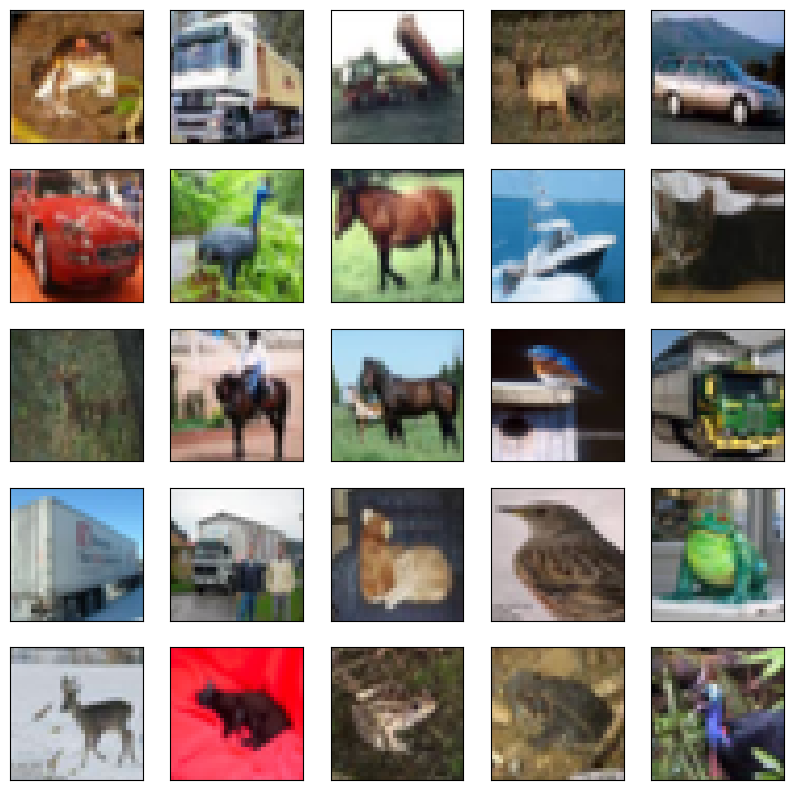

In [10]:
import matplotlib.pyplot as plt
# Visualize the first 25 images from the training dataset
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

To optimize the code and potentially improve the model's performance, I have make a few changes:

Data Augmentation: Applied data augmentation to the training dataset to increase its size and improve generalization.

Dropout: Added dropout layers to the model to prevent overfitting.

Batch Normalization: Introduced Batch Normalization layers to stabilize and accelerate training.

Learning Rate Scheduler: Implemented a learning rate scheduler to adjust the learning rate during training.

Can do if preocessing capacity is present:-

Increased Epochs: Train the model for more epochs to allow it to converge further.

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)

In [18]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential([
    layers.InputLayer(input_shape=(32, 32, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Reshape((-1, 128)),
    DiagonalBiLSTM(256),
    layers.Dropout(0.5),  # Added Dropout layer
    layers.Flatten(),
    layers.Dense(256, activation='relu'),  # Additional dense layer
    layers.BatchNormalization(),  # Added Batch Normalization
    layers.Dropout(0.5),  # Added another Dropout layer
    layers.Dense(10)
])

In [19]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
# Training the model with data augmentation
model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs=8, validation_data=(test_images, test_labels))

Epoch 1/8
1563/1563 [==============================] - 46s 25ms/step - loss: 1.7045 - accuracy: 0.3865 - val_loss: 1.3852 - val_accuracy: 0.5068
Epoch 2/8
1563/1563 [==============================] - 39s 25ms/step - loss: 1.3502 - accuracy: 0.5146 - val_loss: 1.2492 - val_accuracy: 0.5365
Epoch 3/8
1563/1563 [==============================] - 38s 24ms/step - loss: 1.2149 - accuracy: 0.5710 - val_loss: 1.1323 - val_accuracy: 0.6055
Epoch 4/8
1563/1563 [==============================] - 40s 26ms/step - loss: 1.1230 - accuracy: 0.6078 - val_loss: 1.0437 - val_accuracy: 0.6370
Epoch 5/8
1563/1563 [==============================] - 40s 26ms/step - loss: 1.0338 - accuracy: 0.6389 - val_loss: 0.9809 - val_accuracy: 0.6595
Epoch 6/8
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9864 - accuracy: 0.6560 - val_loss: 0.8607 - val_accuracy: 0.7016
Epoch 7/8
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9076 - accuracy: 0.6836 - val_loss: 0.8497 - val_ac

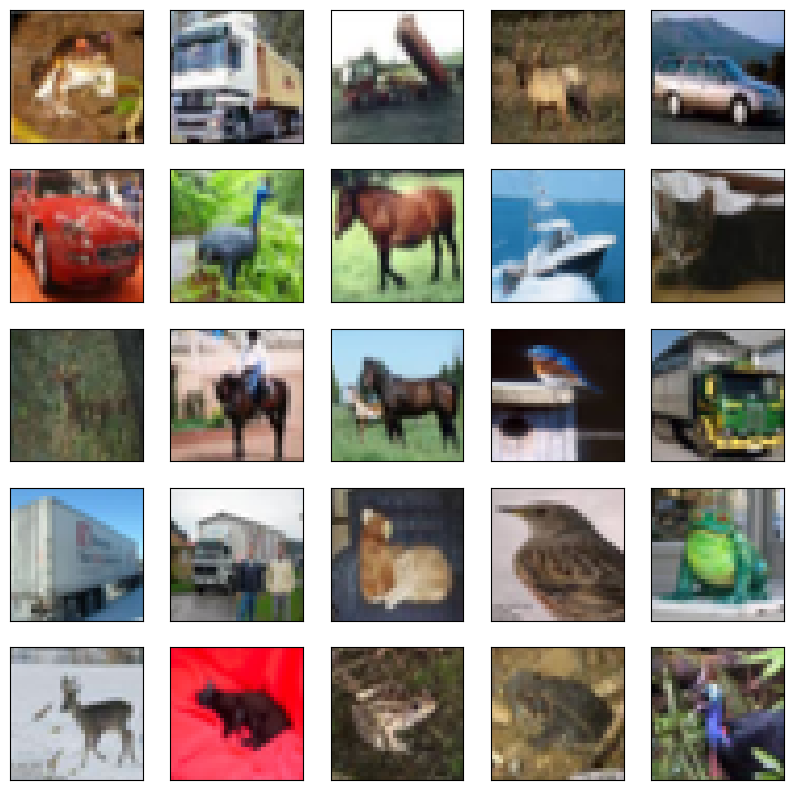

In [21]:
import matplotlib.pyplot as plt
# Visualize the first 25 images from the training dataset
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()